In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
from plotly import tools
from plotly.graph_objs import *
import collections
import calendar
%matplotlib inline 
import datetime
import colorlover as cl
import joypy
from matplotlib import cm
import plotnine as pln

import seaborn as sns
import os
import folium
from folium.plugins import MarkerCluster
print(folium.__version__)

import colorlover as cl
from IPython.display import HTML

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

import ggplot
from ggplot import *
import warnings
warnings.filterwarnings('ignore')

# plotly.tools.set_credentials_file(username='adslwang4601', api_key='RNtOcvlYrBgpU80Tiiuf')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



0.5.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead



In [2]:
InputDir = '../input'
air_visits = pd.read_csv('%s/air_visit_data.csv' % InputDir, parse_dates=['visit_date'])
air_reserve = pd.read_csv('%s/air_reserve.csv' % InputDir, parse_dates= ['visit_datetime', 'reserve_datetime'])
hpg_reserve = pd.read_csv('%s/hpg_reserve.csv' % InputDir, parse_dates= ['visit_datetime', 'reserve_datetime'])
air_store = pd.read_csv('%s/air_store_info.csv' % InputDir)
hpg_store = pd.read_csv('%s/hpg_store_info.csv' % InputDir)
holidays = pd.read_csv('%s/date_info.csv' % InputDir, parse_dates=['calendar_date']).rename(columns={'calendar_date': 'visit_date'})
store_ids = pd.read_csv('%s/store_id_relation.csv' % InputDir)
test = pd.read_csv('%s/sample_submission.csv' % InputDir)

## air_visits

In [3]:
print(air_visits.describe(include='all'))
print('#####################################')
print(air_visits.head())

                air_store_id           visit_date       visitors
count                 252108               252108  252108.000000
unique                   829                  478            NaN
top     air_5c817ef28f236bdf  2017-03-17 00:00:00            NaN
freq                     477                  799            NaN
first                    NaN  2016-01-01 00:00:00            NaN
last                     NaN  2017-04-22 00:00:00            NaN
mean                     NaN                  NaN      20.973761
std                      NaN                  NaN      16.757007
min                      NaN                  NaN       1.000000
25%                      NaN                  NaN       9.000000
50%                      NaN                  NaN      17.000000
75%                      NaN                  NaN      29.000000
max                      NaN                  NaN     877.000000
#####################################
           air_store_id visit_date  visitors
0  air_

## air_reserve

In [4]:
print(air_reserve.describe(include='all'))
print('#####################################')
print(air_reserve.head())

                air_store_id       visit_datetime     reserve_datetime  \
count                  92378                92378                92378   
unique                   314                 4975                 7513   
top     air_8093d0b565e9dbdf  2016-12-24 19:00:00  2016-11-24 18:00:00   
freq                    2263                  255                  106   
first                    NaN  2016-01-01 19:00:00  2016-01-01 01:00:00   
last                     NaN  2017-05-31 21:00:00  2017-04-22 23:00:00   
mean                     NaN                  NaN                  NaN   
std                      NaN                  NaN                  NaN   
min                      NaN                  NaN                  NaN   
25%                      NaN                  NaN                  NaN   
50%                      NaN                  NaN                  NaN   
75%                      NaN                  NaN                  NaN   
max                      NaN          

## hpg_reserve

In [5]:
print(hpg_reserve.describe(include='all'))
print('#####################################')
print(hpg_reserve.head())

                hpg_store_id       visit_datetime     reserve_datetime  \
count                2000320              2000320              2000320   
unique                 13325                 9847                11450   
top     hpg_2afd5b187409eeb4  2016-12-16 19:00:00  2016-12-12 21:00:00   
freq                    1155                10528                  907   
first                    NaN  2016-01-01 11:00:00  2016-01-01 00:00:00   
last                     NaN  2017-05-31 23:00:00  2017-04-22 23:00:00   
mean                     NaN                  NaN                  NaN   
std                      NaN                  NaN                  NaN   
min                      NaN                  NaN                  NaN   
25%                      NaN                  NaN                  NaN   
50%                      NaN                  NaN                  NaN   
75%                      NaN                  NaN                  NaN   
max                      NaN          

## air_store

In [6]:
print(air_store.describe(include='all'))
print('#####################################')
print(air_store.head())

                air_store_id air_genre_name                   air_area_name  \
count                    829            829                             829   
unique                   829             14                             103   
top     air_f267dd70a6a6b5d3        Izakaya  Fukuoka-ken Fukuoka-shi Daimyō   
freq                       1            197                              64   
mean                     NaN            NaN                             NaN   
std                      NaN            NaN                             NaN   
min                      NaN            NaN                             NaN   
25%                      NaN            NaN                             NaN   
50%                      NaN            NaN                             NaN   
75%                      NaN            NaN                             NaN   
max                      NaN            NaN                             NaN   

          latitude   longitude  
count   829.000000

## hpg_store

In [7]:
print(hpg_store.describe(include='all'))
print('#####################################')
print(hpg_store.head())

                hpg_store_id  hpg_genre_name              hpg_area_name  \
count                   4690            4690                       4690   
unique                  4690              34                        119   
top     hpg_3899d5d43b699bb1  Japanese style  Tōkyō-to Shinjuku-ku None   
freq                       1            1750                        257   
mean                     NaN             NaN                        NaN   
std                      NaN             NaN                        NaN   
min                      NaN             NaN                        NaN   
25%                      NaN             NaN                        NaN   
50%                      NaN             NaN                        NaN   
75%                      NaN             NaN                        NaN   
max                      NaN             NaN                        NaN   

           latitude    longitude  
count   4690.000000  4690.000000  
unique          NaN          

## holidays

In [8]:
print(holidays.describe(include='all'))
print('#####################################')
print(holidays.head())

                 visit_date day_of_week  holiday_flg
count                   517         517   517.000000
unique                  517           7          NaN
top     2016-09-08 00:00:00     Tuesday          NaN
freq                      1          74          NaN
first   2016-01-01 00:00:00         NaN          NaN
last    2017-05-31 00:00:00         NaN          NaN
mean                    NaN         NaN     0.067698
std                     NaN         NaN     0.251471
min                     NaN         NaN     0.000000
25%                     NaN         NaN     0.000000
50%                     NaN         NaN     0.000000
75%                     NaN         NaN     0.000000
max                     NaN         NaN     1.000000
#####################################
  visit_date day_of_week  holiday_flg
0 2016-01-01      Friday            1
1 2016-01-02    Saturday            1
2 2016-01-03      Sunday            1
3 2016-01-04      Monday            0
4 2016-01-05     Tuesday      

## store_ids

In [9]:
print(store_ids.describe(include='all'))
print('#####################################')
print(store_ids.head())

                air_store_id          hpg_store_id
count                    150                   150
unique                   150                   150
top     air_90213bcae4afa274  hpg_832ba309e6699258
freq                       1                     1
#####################################
           air_store_id          hpg_store_id
0  air_63b13c56b7201bd9  hpg_4bc649e72e2a239a
1  air_a24bf50c3e90d583  hpg_c34b496d0305a809
2  air_c7f78b4f3cba33ff  hpg_cd8ae0d9bbd58ff9
3  air_947eb2cae4f3e8f2  hpg_de24ea49dc25d6b8
4  air_965b2e0cf4119003  hpg_653238a84804d8e7


## test

In [10]:
print(test.describe(include='all'))
print('#####################################')
print(test.head())

                                     id  visitors
count                             32019   32019.0
unique                            32019       NaN
top     air_cc35590cd1da8554_2017-05-08       NaN
freq                                  1       NaN
mean                                NaN       0.0
std                                 NaN       0.0
min                                 NaN       0.0
25%                                 NaN       0.0
50%                                 NaN       0.0
75%                                 NaN       0.0
max                                 NaN       0.0
#####################################
                                id  visitors
0  air_00a91d42b08b08d9_2017-04-23         0
1  air_00a91d42b08b08d9_2017-04-24         0
2  air_00a91d42b08b08d9_2017-04-25         0
3  air_00a91d42b08b08d9_2017-04-26         0
4  air_00a91d42b08b08d9_2017-04-27         0


# 4 Individual feature visualisations

这里我们在合并他们来做更细致的分析之前。先看一看特征的分布在每个独立文件中。这些初始化可视化将成为我们搭建分析的基础  
Here we have a first look at the distributions of the features  in our individual data files before combining them for a more detailed analysis. This visualization will be the foundation on which we build our analysis.

## 4.1 Air Visits
We start with the number of visitors for air restaurants. Here we plot the total number of visitors per day over the full training time range together with the median visitor per day of the week and month of the year

In [11]:
air_visits_by_date = air_visits.groupby('visit_date')['visitors'].sum(axis=0)
trace1 = go.Scatter(
        x=air_visits_by_date.index, # assign x as the dataframe column 'x'
        y=air_visits_by_date.values,
        mode = 'lines'
    )


air_visits['dayofweek'] = air_visits['visit_date'].dt.dayofweek
air_visits_by_dayofweek = air_visits.groupby('dayofweek')['visitors'].median()
trace2 = go.Bar(
    x=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
    y = air_visits_by_dayofweek.values,
    width = 0.5,
    marker=dict(
        colorscale='Viridis',
        reversescale = False,
        color = [1, 2, 3, 4, 5, 6, 7],
        line=dict(
            color='rgb(8,48,107)',
            width=0.5
        )
          ),
   
)

trace3 = go.Histogram(x=air_visits['visitors'].values)

air_visits['month'] = air_visits['visit_date'].dt.month
air_visits_by_month = air_visits.groupby('month')['visitors'].median()
air_visits.sort_values(by='month')
air_visits_by_month = air_visits_by_month.sort_index()
air_visits_by_month.index = air_visits_by_month.index.map(lambda x: calendar.month_abbr[x])

trace4 = go.Bar(x=air_visits_by_month.index,
           y = air_visits_by_month.values,
        width = 0.5,
        marker=dict(
        colorscale='Viridis',
        reversescale = False,
        color = list(range(1, 13)),
        line=dict(
            color='rgb(8,48,107)',
            width=0.5
        )
          )
)

fig = tools.make_subplots(rows=2, cols=3,  subplot_titles=('The total number of visitors per day ',
                                                          'The count of visitor numbers',
                                                        'the median visitor per day of the week',
                                                          'the median visitor per month of the year'),
                          specs=[[{'colspan': 2}, None, {}], [{'colspan': 2}, None, {}]],
                          shared_xaxes=False, shared_yaxes=False)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 3)

fig['layout']['xaxis1'].update(title='Date')
fig['layout']['yaxis1'].update(title='All visitors')

fig['layout']['xaxis2'].update(tickangle=-45, title='Day of Week')
fig['layout']['yaxis2'].update(title='Median Visitors')

fig['layout']['xaxis3'].update(type='log', title='Visitor')
fig['layout']['yaxis3'].update(title='Count')

fig['layout']['xaxis4'].update(tickangle=-45, title='Month')
fig['layout']['yaxis4'].update(title='Median Visitors')

fig['layout']['font'].update(size=0.1)

py.iplot(fig, filename='styled-line')


This is the format of your plot grid:
[ (1,1) x1,y1           -      ]  [ (1,3) x2,y2 ]
[ (2,1) x3,y3           -      ]  [ (2,3) x4,y4 ]

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~adslwang4601/0 or inside your plot.ly account where it is named 'styled-line'


## 4.2 Air Reservations

Let's see how our reservations data compares to the actual visitor numbers. We start with the air restaurants and visualise their visitor volumn through reservation for each day, alongside the hours of these visits and the time between making a reservation and visiting the restaurant.

In [12]:
# trace 1
air_reserve['visit_date'] = air_reserve['visit_datetime'].dt.date
air_reserve['reser_date'] = air_reserve['reserve_datetime'].dt.date
air_reserve_by_date = air_reserve.groupby('visit_date')['reserve_visitors'].sum()
air_reserve_by_reserve_date = air_reserve.groupby('reser_date')['reserve_visitors'].sum()

trace1_1 = go.Scatter(
        x=air_reserve_by_date.index, # assign x as the dataframe column 'x'
        y=air_reserve_by_date.values,
        mode = 'lines',
        name = 'visit',
        marker = dict(
        line=dict(
            color='rgb(8,48,107)',
            width=0.1
        )      
        )
    )

trace1_2 =go.Scatter(
        x=air_reserve_by_reserve_date.index, # assign x as the dataframe column 'x'
        y=air_reserve_by_reserve_date.values,
        mode = 'lines',
        name = 'reservation',
        marker = dict(
        line=dict(
            color='rgb(8,48,107)',
            width=0.1
        )      
        )
    )

# trace 2
air_reserve['reserve_hour'] = air_reserve['reserve_datetime'].dt.hour
air_reserve['visit_hour'] = air_reserve['visit_datetime'].dt.hour
air_reserve_by_hour = air_reserve.groupby('visit_hour')['reserve_visitors'].sum(axis=0).sort_index()
trace2 = go.Bar(
    x = air_reserve_by_hour.index,
    y = air_reserve_by_hour.values,
    width = 0.5,
    marker=dict(
#         colorscale='Viridis',
#         reversescale = False,
        color = 'blue',
        line=dict(
            color='rgb(8,48,107)',
            width=0.5
        )
          ),
   
)

# trace 3
air_reserve['period'] = air_reserve['visit_datetime'] - air_reserve['reserve_datetime']
air_reserve['period'] = air_reserve['period']/np.timedelta64(1, 'h')
air_reserve_by_period = air_reserve.groupby('period')['reserve_visitors'].sum(axis=0).sort_index()
air_reserve_by_period = air_reserve_by_period[air_reserve_by_period.index < 24*5]
trace3 = go.Bar(
    x = air_reserve_by_period.index,
    y = air_reserve_by_period.values,
    width = 0.2,
    marker=dict(
#         colorscale='Viridis',
#         reversescale = False,
        color = 'blue',
        line=dict(
            color='rgb(8,48,107)',
            width=0.5
                    )
                ),
   
            )

fig = tools.make_subplots(rows=2, cols=2,  subplot_titles=('The total number of visitors through reservation per day',
                                                          'The total number of visitors through reservation each hour',
                                                          'the time between reservation and visit'
                                                         ),
                          specs=[[{'colspan': 2}, None], [{}, {}]],
                          shared_xaxes=False, shared_yaxes=False)
fig.append_trace(trace1_1, 1, 1)
fig.append_trace(trace1_2, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig['layout']['xaxis1'].update(title='Date')
fig['layout']['yaxis1'].update(title='All visitors')

fig['layout']['xaxis2'].update(title='visit_hour')
fig['layout']['yaxis2'].update(title='All visitors')

fig['layout']['xaxis3'].update(title='Time from reservation to visit',  dtick=10)
fig['layout']['yaxis3'].update(title='All visitors')

# fig['layout'].update(showlegend=False)

py.iplot(fig, filename='styled-line')

This is the format of your plot grid:
[ (1,1) x1,y1           -      ]
[ (2,1) x2,y2 ]  [ (2,2) x3,y3 ]

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~adslwang4601/0 or inside your plot.ly account where it is named 'styled-line'


### 4.3 HPG Reservations

In [13]:
# trace 1
hpg_reserve['visit_date'] = hpg_reserve['visit_datetime'].dt.date
hpg_reserve['reser_date'] = hpg_reserve['reserve_datetime'].dt.date
hpg_reserve_by_date = hpg_reserve.groupby('visit_date')['reserve_visitors'].sum()
hpg_reserve_by_reserve_date = hpg_reserve.groupby('reser_date')['reserve_visitors'].sum()

trace1_1 = go.Scatter(
        x=hpg_reserve_by_date.index, # assign x as the dataframe column 'x'
        y=hpg_reserve_by_date.values,
        mode = 'lines',
        name = 'visit',
        marker = dict(
        line=dict(
            color='rgb(8,48,107)',
            width=0.1
        )      
        )
    )

trace1_2 =go.Scatter(
        x=hpg_reserve_by_reserve_date.index, # assign x as the dataframe column 'x'
        y=hpg_reserve_by_reserve_date.values,
        mode = 'lines',
        name = 'reservation',
        marker = dict(
        line=dict(
            color='rgb(8,48,107)',
            width=0.1
        )      
        )
    )

# trace 2
hpg_reserve['reserve_hour'] = hpg_reserve['reserve_datetime'].dt.hour
hpg_reserve['visit_hour'] = hpg_reserve['visit_datetime'].dt.hour
hpg_reserve_by_hour = hpg_reserve.groupby('visit_hour')['reserve_visitors'].sum(axis=0).sort_index()
trace2 = go.Bar(
    x = hpg_reserve_by_hour.index,
    y = hpg_reserve_by_hour.values,
    width = 0.5,
    marker=dict(
#         colorscale='Viridis',
#         reversescale = False,
        color = 'blue',
        line=dict(
            color='rgb(8,48,107)',
            width=0.5
        )
          ),
   
)

# trace 3
hpg_reserve['period'] = hpg_reserve['visit_datetime'] - hpg_reserve['reserve_datetime']
hpg_reserve['period'] = hpg_reserve['period']/np.timedelta64(1, 'h')
hpg_reserve_by_period = hpg_reserve.groupby('period')['reserve_visitors'].sum(axis=0).sort_index()
hpg_reserve_by_period = hpg_reserve_by_period[hpg_reserve_by_period.index < 24*5]
trace3 = go.Bar(
    x = hpg_reserve_by_period.index,
    y = hpg_reserve_by_period.values,
    width = 0.2,
    marker=dict(
#         colorscale='Viridis',
#         reversescale = False,
        color = 'blue',
        line=dict(
            color='rgb(8,48,107)',
            width=0.5
                    )
                ),
   
            )

fig = tools.make_subplots(rows=2, cols=2,  subplot_titles=('The total number of visitors through reservation per day',
                                                          'The total number of visitors through reservation each hour',
                                                          'the time between reservation and visit'
                                                         ),
                          specs=[[{'colspan': 2}, None], [{}, {}]],
                          shared_xaxes=False, shared_yaxes=False)
fig.append_trace(trace1_1, 1, 1)
fig.append_trace(trace1_2, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig['layout']['xaxis1'].update(title='Date')
fig['layout']['yaxis1'].update(title='All visitors')

fig['layout']['xaxis2'].update(title='visit_hour')
fig['layout']['yaxis2'].update(title='All visitors')

fig['layout']['xaxis3'].update(title='Time from reservation to visit',  dtick=10)
fig['layout']['yaxis3'].update(title='All visitors')

# fig['layout'].update(showlegend=False)

py.iplot(fig, filename='styled-line')

This is the format of your plot grid:
[ (1,1) x1,y1           -      ]
[ (2,1) x2,y2 ]  [ (2,2) x3,y3 ]

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~adslwang4601/0 or inside your plot.ly account where it is named 'styled-line'


### 4.5 HPG Store

In [21]:
import numpy as np

size = 100
lons = hpg_store['longitude']
lats = hpg_store['latitude']

locations = list(zip(lats, lons))
popups = hpg_store['hpg_store_id']
label = hpg_store['hpg_genre_name']

from folium.plugins import MarkerCluster


m = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='Cartodb Positron',
    zoom_start=1
)

marker_cluster = MarkerCluster(
    locations=locations, popups=popups,
    icons = label,
    name='1000 clustered icons',
    overlay=True,
    control=True,
#     icon_create_function=icon_create_function
)

marker_cluster.add_to(m)

folium.LayerControl().add_to(m)

# m.save(os.path.join('results', '1000_MarkerCluster1.html'))

m

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [15]:
hpg_genre_count = hpg_store['hpg_genre_name'].value_counts(ascending=True)
trace1 = go.Bar(x=hpg_genre_count, y=hpg_genre_count.index, orientation='h',
                marker=dict(
                color=hpg_genre_count,
                colorscale = 'Portland',
                reversescale = True
                            )
               )

hpg_area_count = hpg_store['hpg_area_name'].apply(lambda x: x[:10]).value_counts(ascending=True)
trace2 = go.Bar(x=hpg_area_count, y=hpg_area_count.index, orientation='h',
               marker=dict(
                color=hpg_area_count,
                colorscale = 'Portland',
                reversescale = True
                            )
               )


                     
fig = tools.make_subplots(rows=1, cols=2, shared_xaxes=False, shared_yaxes=False)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)


fig['layout']['xaxis1'].update(title='Number of hpg restaurants')
fig['layout']['yaxis1'].update(title='Type of cuisine', ticklen= 5, gridwidth=1)

fig['layout']['xaxis2'].update(title='Number of hpg restaurants')
fig['layout']['yaxis2'].update(title='Areas')

fig['layout'].update(autosize=True, width=1000, height=700, margin=go.Margin(
        l=230
    ))
# fig['layout'].update(showlegend=False)

plotly.offline.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### 4.6 Holidays

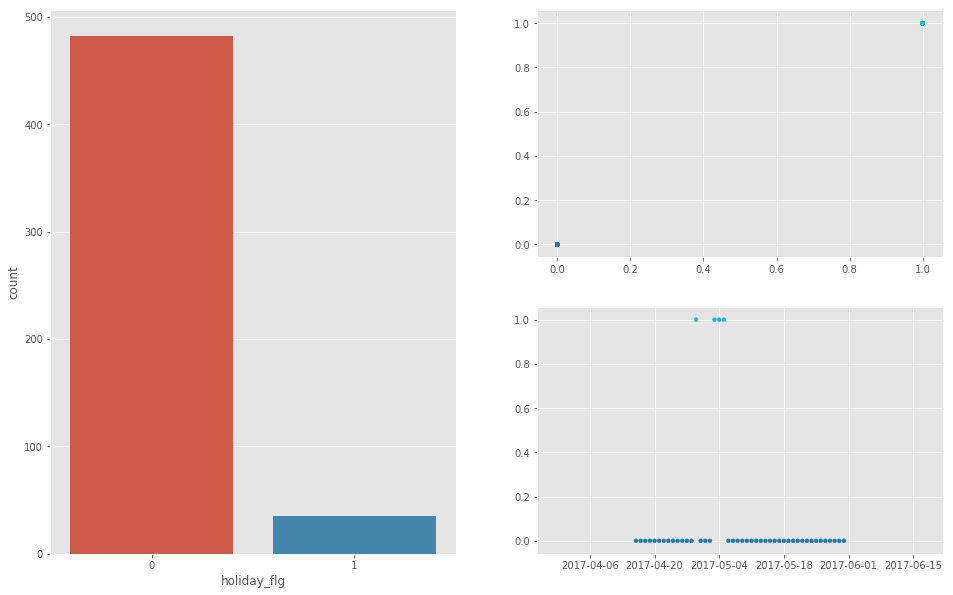

In [16]:
# plt.figure()
# print(ggplot(aes(x='holiday_flg'), data=holidays) + \
#      geom_bar())
# holidays_count = holidays['holiday_flg'].values_counts
# construct cmap
# my_cmap = sns.light_palette("Navy", as_cmap=True)
# my_cmap  = sns.color_palette("hls", 8, as_cmap=True)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette())

plt.style.use('ggplot')
plt.figure(figsize=(16,10))

plt.subplot2grid((2, 2), (0, 0), rowspan=2)
sns.countplot(x='holiday_flg', data=holidays)

plt.subplot2grid((2, 2), (0, 1))
holiday_2016 = (holidays['visit_date'] < datetime.date(2016, 6, 1)) & (holidays['visit_date'] > datetime.date(2016, 4, 15))
holiday_flg_2016 = (holidays['visit_date'] < datetime.date(2016, 6, 1)) & (holidays['visit_date'] > datetime.date(2016, 4, 15))
plt.scatter(x=holiday_2016.values, y=holiday_flg_2016.values, c=holiday_flg_2016.values, s=15, cmap=cmap)

plt.subplot2grid((2, 2), (1, 1))
holiday_2016 = holidays['visit_date'] [(holidays['visit_date'] < datetime.date(2017, 6, 1)) & (holidays['visit_date'] > datetime.date(2017, 4, 15))]
holiday_flg_2016 = holidays['holiday_flg'][(holidays['visit_date'] < datetime.date(2017, 6, 1)) & (holidays['visit_date'] > datetime.date(2017, 4, 15))]
plt.scatter(x=holiday_2016.values, y=holiday_flg_2016.values, c=holiday_flg_2016.values, s=15, cmap=cmap)
# sns.countplot(x='holiday_flg', data=holidays)
# plt.tight_layout()

## 5 Feature relations
### 5.1 Visitors per genre

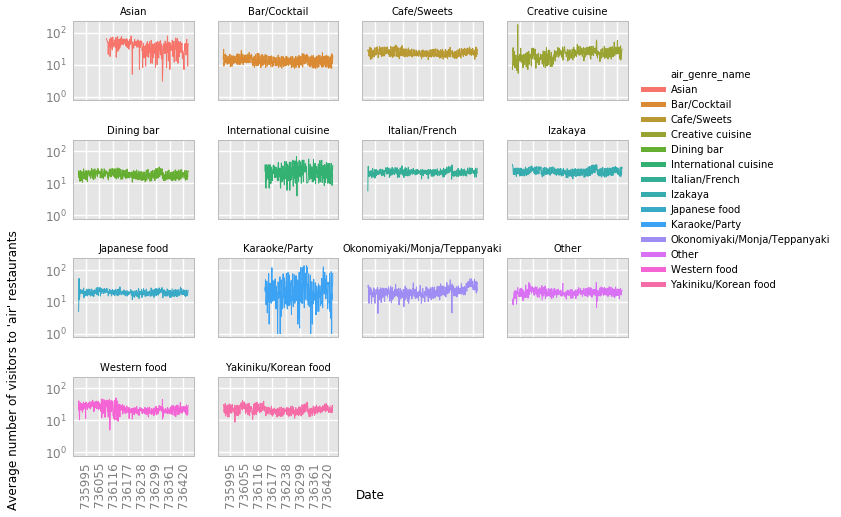

<ggplot: (-9223372036561858230)>

In [17]:
air_join = air_visits.merge(air_store, on='air_store_id', how='left')
air_group = air_join.groupby(['visit_date', 'air_genre_name'])['visitors'].mean().to_frame().reset_index()
ggplot(aes('visit_date', 'visitors', color = 'air_genre_name'), air_group) +\
    geom_line()+\
    scale_y_log()+\
    labs(y = "Average number of visitors to 'air' restaurants", x = "Date") +\
    facet_wrap('air_genre_name', scales="fixed") +\
    theme(axis_text_x = element_text(angle=90))+\
    scale_x_date(labels = date_format("%m-%Y"))

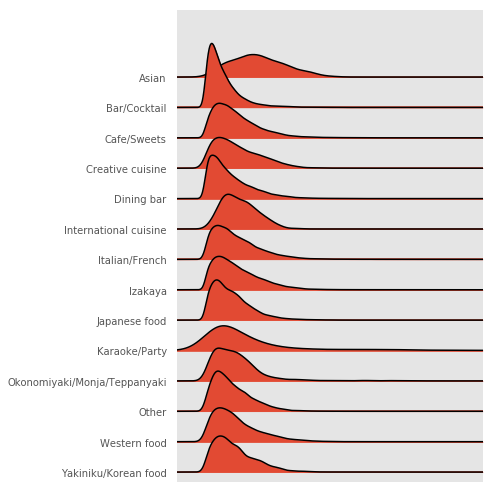

In [19]:
# p1 <- foo %>%
#   mutate(wday = wday(visit_date, label = TRUE)) %>%
#   group_by(wday, air_genre_name) %>%
#   summarise(mean_visitors = mean(visitors)) %>%
#   ggplot(aes(air_genre_name, mean_visitors, color = wday)) +
#   geom_point(size = 4) +
#   theme(legend.position = "left", axis.text.y = element_blank(),
#         plot.title = element_text(size = 14)) +
#   coord_flip() +
#   labs(x = "") +
#   scale_x_discrete(position = "top") +
#   ggtitle("air_genre_name") +
#   scale_color_hue()
ryb = cl.scales['7']['qual']['Paired']

air_join['wday'] = air_join['visit_date'].dt.weekday
air_join_wday = air_join.groupby(['wday', 'air_genre_name'])['visitors'].mean().to_frame().reset_index()

data = list(range(7))
legend_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
for weekday in air_join['wday'].unique():
    air_join_some  = air_join_wday[air_join_wday['wday']==weekday]
    
    data[weekday] = go.Scatter(
        x = air_join_some ['visitors'],
        y = air_join_some ['air_genre_name'],
        mode='markers',
        marker=dict(
            size='16',
            color = ryb[weekday], #set color equal to a variable
        ),
        name= legend_names[weekday]
    )



layout= go.Layout(
    title= 'Stats of USA States',
    hovermode= 'closest',
    xaxis= dict(
        title= 'mean_visitors',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'air_genre_name',
        ticklen= 5,
        gridwidth= 2,
    ),
    margin=go.Margin(l=250),
    showlegend = True
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)


fig, axes = joypy.joyplot(air_join, by="air_genre_name", column="visitors",
                          figsize=(7,7), x_range=(-20, 200), xlabels='visitors'
                         )

### 5.2 The impact of holidays

In [20]:
airvisit_temp = air_visits.merge(holidays, how='left', on='visit_date')
trace1 = go.Box(y=airvisit_temp[airvisit_temp.holiday_flg==0]['visitors'], name='Non_Holiday')
trace2 = go.Box(y=airvisit_temp[airvisit_temp.holiday_flg==1]['visitors'],name='Holiday')

airvisit_temp2 = airvisit_temp.groupby(['day_of_week', 'holiday_flg', 'dayofweek'])['visitors'].mean()
airvisit_temp2 = airvisit_temp2.to_frame().reset_index().sort_values(by='dayofweek')
trace3 = go.Scatter(x=airvisit_temp2['day_of_week'][airvisit_temp2.holiday_flg==0], 
                    y=airvisit_temp2['visitors'][airvisit_temp2.holiday_flg==0],
                    mode = 'markers', marker=dict(size = 15, color=ryb[1]), name='weekday')
trace4 = go.Scatter(x=airvisit_temp2['day_of_week'][airvisit_temp2.holiday_flg==1], 
                    y=airvisit_temp2['visitors'][airvisit_temp2.holiday_flg==1],
                   mode = 'markers', marker=dict(size = 15, color=ryb[3]), name='weekend')

fig = tools.make_subplots(rows=1, cols=2, shared_xaxes=False, shared_yaxes=False)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)


fig['layout']['yaxis1'].update(type='log')


plotly.offline.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



###  5.3 Restaurants per area and the effect on visitor numbers

In [ ]:
pln.ggplot(air_store, pln.aes('air_area_name', 'air_genre_name')) +\
pln.geoms.geom_count()

In [25]:
a = [{'a':1, 'b':2}, {'a':3, 'b':4}]
pd.DataFrame(a, index=range(len(a)))

a  b
0  1  2
1  3  4